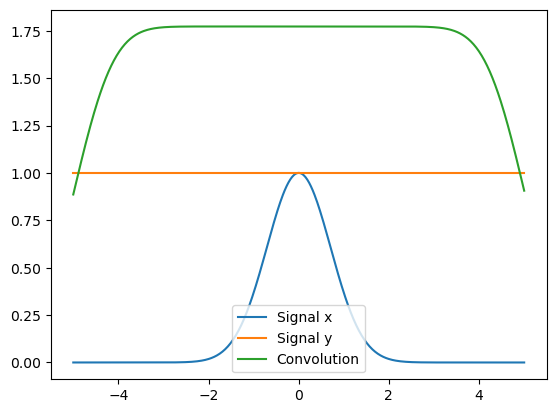

In [1]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt

# Étape 1 : Définir les signaux d'entrée
t = np.linspace(-5, 5, 500)  # Créer un vecteur de temps allant de -5 à 5, avec 500 échantillons
# Signal x : une fonction gaussienne (courbe en cloche)
x = np.exp(-t**2)  # La fonction exp(-t^2) génère une distribution gaussienne centrée en 0
# Signal y : une fonction échelon, prenant la valeur 1 pour t > 0, et 0 pour t <= 0
y = np.ones_like(t)  # Fonction échelon définie comme 1 pour tous les t

# Étape 2 : Calcul de la convolution continue (approximation)
# La convolution entre x et y est effectuée avec la fonction `convolve` de SciPy
resultat = convolve(x, y, mode='same') * (t[1] - t[0])  # Le mode 'same' garantit que le résultat a la même longueur que x
# Multiplier par (t[1] - t[0]) permet de compenser l'approximation numérique, pour s'assurer que l'intégration est correcte

# Étape 3 : Affichage des signaux et de leur convolution
plt.plot(t, x, label="Signal x")  # Tracer le signal x (gaussienne)
plt.plot(t, y, label="Signal y")  # Tracer le signal y (fonction échelon)
plt.plot(t, resultat, label="Convolution")  # Tracer le résultat de la convolution entre x et y
plt.legend()  # Ajouter une légende pour distinguer les courbes
plt.show()  # Afficher le graphique


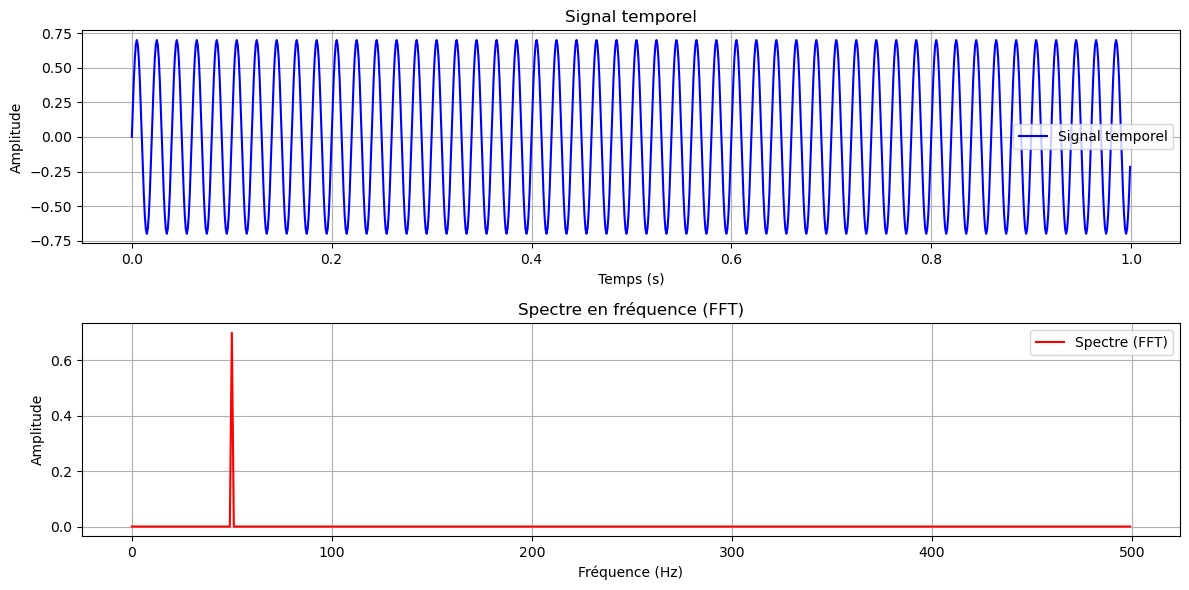

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Définir un signal temporel
# Un signal sinusoidal simple sans bruit

# Fréquence d'échantillonnage (en Hz)
Fs = 1000  # La fréquence d'échantillonnage est de 1000 Hz, cela signifie que le signal est échantillonné 1000 fois par seconde.
T = 1 / Fs  # La période d'échantillonnage est l'inverse de la fréquence d'échantillonnage.
L = 1000    # Nombre de points dans le signal, ici nous avons 1000 échantillons.
t = np.linspace(0, (L-1)*T, L)  # Vecteur de temps qui va de 0 à (L-1)*T. Cela crée un vecteur contenant les moments d'échantillonnage du signal.

# Fréquence du signal (en Hz)
f_signal = 50  # Fréquence du signal sinusoidal (50 Hz). Cela signifie que le signal complet oscillera 50 fois par seconde.

# Générer le signal (sinus pur)
signal = 0.7 * np.sin(2 * np.pi * f_signal * t)  # Génération du signal sinusoidal pur. L'amplitude du signal est 0.7.

# Étape 2 : Calculer la Transformée de Fourier Rapide (FFT)
# La FFT est utilisée pour transformer un signal du domaine temporel au domaine fréquentiel.

fft_result = np.fft.fft(signal)  # Calcul de la FFT du signal. La fonction np.fft.fft calcule la transformée de Fourier discrète du signal.
fft_magnitude = np.abs(fft_result / L)  # Calcul de la magnitude de la FFT normalisée. La normalisation permet de ramener l'amplitude dans une plage raisonnable.
fft_magnitude = fft_magnitude[:L//2] * 2  # Nous ne conservons que la moitié positive du spectre, car pour un signal réel, la moitié négative est symétrique.

# Étape 3 : Calculer les fréquences associées
# La fonction np.fft.fftfreq génère un vecteur de fréquences correspondant à chaque point dans la FFT.

frequencies = np.fft.fftfreq(L, T)[:L//2]  # Cette fonction génère les fréquences associées à chaque composant de la FFT. On garde que la moitié positive.

# Étape 4 : Visualiser le signal et son spectre
plt.figure(figsize=(12, 6))  # Création d'une figure avec une taille spécifiée (largeur x hauteur).

# Afficher le signal temporel
plt.subplot(2, 1, 1)  # Diviser l'espace de la figure en 2 lignes et 1 colonne, et activer la première zone (pour le signal temporel).
plt.plot(t, signal, color='blue', label='Signal temporel')  # Tracer le signal temporel avec une ligne bleue.
plt.title('Signal temporel')  # Ajouter un titre à cette sous-figure.
plt.xlabel('Temps (s)')  # Légende de l'axe des abscisses (temps).
plt.ylabel('Amplitude')  # Légende de l'axe des ordonnées (amplitude du signal).
plt.grid()  # Afficher une grille pour faciliter la lecture des valeurs.
plt.legend()  # Afficher la légende du graphique.

# Afficher le spectre en fréquence
plt.subplot(2, 1, 2)  # Activer la deuxième zone pour le spectre en fréquence.
plt.plot(frequencies, fft_magnitude, color='red', label='Spectre (FFT)')  # Tracer le spectre en fréquence avec une ligne rouge.
plt.title('Spectre en fréquence (FFT)')  # Ajouter un titre à cette sous-figure.
plt.xlabel('Fréquence (Hz)')  # Légende de l'axe des abscisses (fréquences).
plt.ylabel('Amplitude')  # Légende de l'axe des ordonnées (amplitude du spectre).
plt.grid()  # Afficher une grille pour une meilleure lecture.
plt.legend()  # Afficher la légende du graphique.

# Ajuster la disposition des sous-figures pour éviter les chevauchements
plt.tight_layout()  # Cette fonction ajuste les sous-figures pour que tout le contenu soit bien visible.

# Afficher la figure avec les graphiques
plt.show()

# Explications :
# 1. Le signal temporel est un sinus pur à 50 Hz, sans aucun bruit ajouté. Il est généré à l'aide de la fonction np.sin.
# 2. La fonction np.fft.fft est utilisée pour calculer la Transformée de Fourier Rapide, qui transforme le signal du domaine temporel (temps) au domaine fréquentiel (fréquences).
# 3. La magnitude du spectre est normalisée par la longueur du signal (L) pour éviter une amplitude trop élevée.
# 4. Le spectre en fréquence montre la répartition de l'énergie du signal en fonction des fréquences. Dans ce cas, on devrait voir un pic à 50 Hz (la fréquence du signal original).


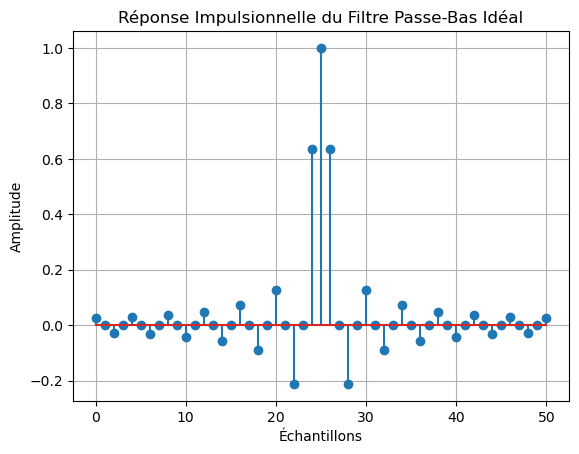

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Définir les paramètres du filtre
fc = 0.25  # Fréquence de coupure normalisée (par rapport à la fréquence de Nyquist). 
           # Ici, 0.25 signifie que la fréquence de coupure est égale à 25% de la fréquence de Nyquist.
N = 51      # Longueur du filtre (nombre de coefficients du filtre). 
           # N doit être un nombre impair pour que le filtre ait un centre symétrique.

# Étape 2 : Calcul de la réponse impulsionnelle idéale
M = (N - 1) // 2  # Calcul de l'indice du centre du filtre (milieu de la fenêtre de taille N)
n = np.arange(N)  # Créer un vecteur n allant de 0 à N-1 pour représenter les indices des échantillons
# La réponse impulsionnelle idéale du filtre passe-bas est donnée par une fonction sinc
h = np.sinc(2 * fc * (n - M))  # Fonction sinc, ajustée pour avoir la fréquence de coupure fc
# La fonction sinc est définie comme sin(x)/x. Elle permet de créer un filtre idéal sans aliasing.

# Étape 3 : Affichage de la réponse impulsionnelle
plt.stem(h)  # Utilisation de stem pour afficher la réponse impulsionnelle sous forme de "tiges" (échantillons discrets)
plt.title("Réponse Impulsionnelle du Filtre Passe-Bas Idéal")  # Titre du graphique
plt.xlabel("Échantillons")  # Label pour l'axe des x (indices des échantillons)
plt.ylabel("Amplitude")  # Label pour l'axe des y (amplitude de la réponse impulsionnelle)
plt.grid()  # Afficher une grille pour faciliter la lecture des valeurs sur les axes
plt.show()  # Afficher le graphique


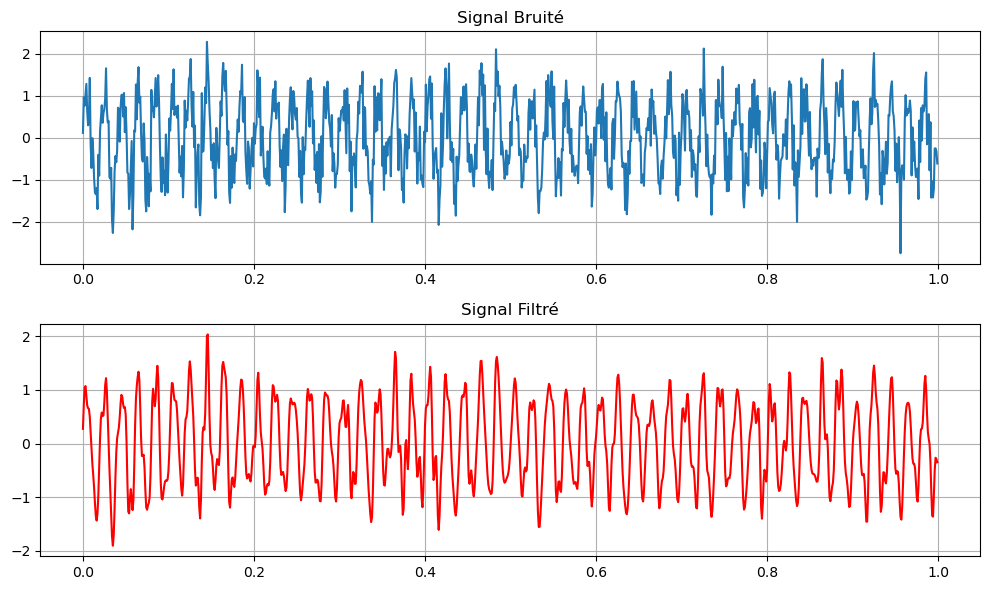

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Générer un signal bruité
# Définir les paramètres du signal
Fs, L, f_signal = 1000, 1000, 50  # Fréquence d'échantillonnage (1000 Hz), longueur du signal (1000 échantillons), fréquence du signal (50 Hz)
t = np.linspace(0, (L-1)/Fs, L)  # Vecteur de temps. Création d'un vecteur de temps allant de 0 à (L-1)/Fs, réparti sur L échantillons.

# Générer le signal pur (sinusoidal à 50 Hz) et ajouter du bruit gaussien
signal = np.sin(2 * np.pi * f_signal * t) + 0.5 * np.random.randn(L)  # Signal sinusoidal à 50 Hz + bruit aléatoire (bruit blanc gaussien)

# Étape 2 : Définir le filtre FIR (passe-bas)
# Définir la fréquence de coupure normalisée
cutoff = 100 / (Fs / 2)  # Fréquence de coupure du filtre en Hz, normalisée par la fréquence de Nyquist (Fs / 2).
# Calcul de la réponse impulsionnelle du filtre FIR en utilisant la fonction sinc
num_taps = 101  # Nombre de coefficients du filtre (impulsions), ici 101 pour une transition douce.
fir_filter = np.sinc(2 * cutoff * (np.arange(num_taps) - (num_taps-1)/2))  # La fonction sinc génère un filtre idéal passe-bas.

# Appliquer la fenêtre de Hamming pour réduire les lobes latéraux du filtre
fir_filter *= np.hamming(num_taps)  # La fenêtre de Hamming est appliquée pour éviter les oscillations indésirables (effet de Gibb's).
fir_filter /= np.sum(fir_filter)  # Normalisation du filtre pour que sa réponse en fréquence soit correcte (gain total égal à 1).

# Étape 3 : Filtrage du signal
# Appliquer le filtre FIR au signal bruité
filtered_signal = np.convolve(signal, fir_filter, mode='same')  # Convolution du signal avec le filtre FIR. Le mode 'same' conserve la même longueur du signal.

# Étape 4 : Affichage des résultats
plt.figure(figsize=(10, 6))  # Créer une figure avec une taille de 10x6 pouces.

# Afficher le signal bruité
plt.subplot(2, 1, 1)  # Diviser la figure en 2 sous-graphes (2 lignes, 1 colonne) et activer la première zone pour afficher le signal bruité.
plt.plot(t, signal, label="Signal Bruité")  # Tracer le signal bruité en bleu.
plt.title("Signal Bruité")  # Titre du graphique pour le signal bruité.
plt.grid(True)  # Afficher une grille pour faciliter la lecture des valeurs sur les axes.

# Afficher le signal filtré
plt.subplot(2, 1, 2)  # Activer la deuxième zone pour afficher le signal filtré.
plt.plot(t, filtered_signal, label="Signal Filtré", color='red')  # Tracer le signal filtré en rouge.
plt.title("Signal Filtré")  # Titre du graphique pour le signal filtré.
plt.grid(True)  # Afficher une grille pour faciliter la lecture des valeurs sur les axes.

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()  # Cette fonction ajuste les sous-graphes pour éviter les chevauchements de titres ou axes.

# Afficher les graphiques
plt.show()

# Explications :
# 1. Le signal bruité est une combinaison d'un signal sinusoidal pur de 50 Hz et d'un bruit aléatoire ajouté (gaussien).
# 2. Le filtre FIR est conçu pour supprimer les hautes fréquences et ne laisser passer que celles inférieures à 100 Hz (frequencies below Nyquist).
# 3. La réponse impulsionnelle du filtre FIR est calculée avec la fonction sinc et une fenêtre de Hamming est appliquée pour améliorer la performance du filtre.
# 4. Le signal filtré est obtenu en convoluant le signal bruité avec la réponse impulsionnelle du filtre. Cela permet de supprimer le bruit tout en conservant les caractéristiques du signal original.
# 5. Les résultats sont affichés sous forme de deux graphiques : le signal bruité et le signal après filtrage.


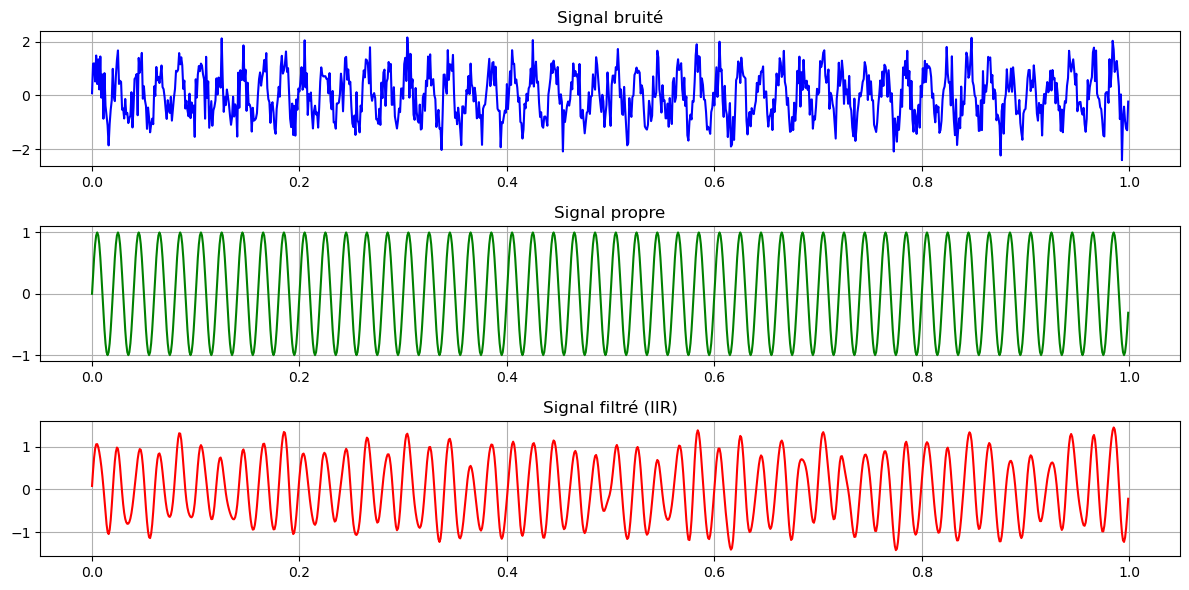

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Étape 1 : Création du signal bruité
# Définir les paramètres du signal
Fs, L, f_signal = 1000, 1000, 50  # Fréquence d'échantillonnage (1000 Hz), longueur du signal (1000 échantillons), fréquence du signal (50 Hz)
t = np.linspace(0, (L-1)/Fs, L)  # Vecteur de temps allant de 0 à (L-1)/Fs, avec L échantillons.

# Générer le signal pur (sinusoidal à 50 Hz) et ajouter du bruit gaussien
noisy_signal = np.sin(2 * np.pi * f_signal * t) + 0.5 * np.random.randn(L)  # Signal sinusoidal à 50 Hz + bruit aléatoire (bruit blanc gaussien)

# Étape 2 : Filtrage passe-bas avec un filtre IIR (Butterworth)
# Définir les coefficients du filtre Butterworth
# Le filtre Butterworth est un filtre IIR qui permet de supprimer les fréquences au-dessus d'une certaine limite.
b, a = butter(4, 100 / (Fs / 2), btype='low')  # Ordre du filtre = 4, fréquence de coupure = 100 Hz (normalisée par la fréquence de Nyquist)
# La fréquence de Nyquist est égale à Fs / 2 (500 Hz ici), donc la fréquence de coupure 100 Hz devient 100 / 500 = 0.2 (normalisée).

# Appliquer le filtre Butterworth au signal bruité
filtered_signal = filtfilt(b, a, noisy_signal)  # Utilisation de filtfilt pour appliquer le filtre de manière zéro-phase (pas de décalage temporel).

# Étape 3 : Affichage des résultats
plt.figure(figsize=(12, 6))  # Créer une figure avec une taille de 12x6 pouces.

# Afficher le signal bruité
plt.subplot(3, 1, 1)  # Diviser la figure en 3 sous-graphes (3 lignes, 1 colonne) et activer la première zone pour afficher le signal bruité.
plt.plot(t, noisy_signal, 'b')  # Tracer le signal bruité en bleu.
plt.title('Signal bruité')  # Titre du graphique pour le signal bruité.
plt.grid()  # Afficher une grille pour faciliter la lecture des valeurs sur les axes.

# Afficher le signal propre (sinusoidal sans bruit)
plt.subplot(3, 1, 2)  # Activer la deuxième zone pour afficher le signal propre (sans bruit).
plt.plot(t, np.sin(2 * np.pi * f_signal * t), 'g')  # Tracer le signal pur (sinusoidal) en vert.
plt.title('Signal propre')  # Titre du graphique pour le signal pur.
plt.grid()  # Afficher une grille.

# Afficher le signal filtré
plt.subplot(3, 1, 3)  # Activer la troisième zone pour afficher le signal filtré.
plt.plot(t, filtered_signal, 'r')  # Tracer le signal filtré en rouge.
plt.title('Signal filtré (IIR)')  # Titre du graphique pour le signal filtré.
plt.grid()  # Afficher une grille.

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()  # Ajuster la mise en page des graphiques pour éviter les chevauchements de titres ou axes.

# Afficher les graphiques
plt.show()

# Explications :
# 1. Le signal bruité est une combinaison d'un signal sinusoidal pur de 50 Hz et d'un bruit aléatoire ajouté (bruit blanc gaussien).
# 2. Le filtre Butterworth est un filtre IIR passe-bas qui permet de supprimer les fréquences plus élevées que la fréquence de coupure spécifiée.
# 3. La fonction `butter` génère les coefficients du filtre Butterworth en fonction de l'ordre (ici 4) et de la fréquence de coupure normalisée.
# 4. Le filtre est appliqué au signal bruité à l'aide de `filtfilt`. La fonction `filtfilt` applique le filtre dans les deux directions (avant et arrière), ce qui permet d'éviter un décalage temporel.
# 5. Les résultats sont affichés sous forme de trois graphiques : le signal bruité, le signal propre sans bruit, et le signal filtré après l'application du filtre Butterworth.
